# Financial Dataset Analysis
(Source: online - missing atm)

## Load packages

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import io

## 1. Data table: cards_data.csv

### a. Load dataset

In [21]:

cards_df = pd.read_csv("cards_data.csv")
print(cards_df.head())
print(cards_df.info())

     id  client_id  card_brand        card_type       card_number  expires  \
0  4524        825        Visa            Debit  4344676511950444  12/2022   
1  2731        825        Visa            Debit  4956965974959986  12/2020   
2  3701        825        Visa            Debit  4582313478255491  02/2024   
3    42        825        Visa           Credit  4879494103069057  08/2024   
4  4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   

   cvv has_chip  num_cards_issued credit_limit acct_open_date  \
0  623      YES                 2       $24295        09/2002   
1  393      YES                 2       $21968        04/2014   
2  719      YES                 2       $46414        07/2003   
3  693       NO                 1       $12400        01/2003   
4   75      YES                 1          $28        09/2008   

   year_pin_last_changed card_on_dark_web  
0                   2008               No  
1                   2014               No  
2       

In [22]:
print(cards_df.dtypes)

id                        int64
client_id                 int64
card_brand               object
card_type                object
card_number               int64
expires                  object
cvv                       int64
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
dtype: object


### b. Data Cleaning

#### No missing values and no duplicate rows detected

In [23]:
print(cards_df.isnull().sum())

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64


In [24]:
print(cards_df.duplicated().sum()) 
cards_df = cards_df.drop_duplicates()

0


In [25]:
duplicated_id = cards_df["id"].duplicated()
print(cards_df[duplicated_id])

Empty DataFrame
Columns: [id, client_id, card_brand, card_type, card_number, expires, cvv, has_chip, num_cards_issued, credit_limit, acct_open_date, year_pin_last_changed, card_on_dark_web]
Index: []


In [26]:
cards_df = cards_df.set_index("id")

In [27]:
print(cards_df.head())

      client_id  card_brand        card_type       card_number  expires  cvv  \
id                                                                             
4524        825        Visa            Debit  4344676511950444  12/2022  623   
2731        825        Visa            Debit  4956965974959986  12/2020  393   
3701        825        Visa            Debit  4582313478255491  02/2024  719   
42          825        Visa           Credit  4879494103069057  08/2024  693   
4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   75   

     has_chip  num_cards_issued credit_limit acct_open_date  \
id                                                            
4524      YES                 2       $24295        09/2002   
2731      YES                 2       $21968        04/2014   
3701      YES                 2       $46414        07/2003   
42         NO                 1       $12400        01/2003   
4659      YES                 1          $28        09/2008  

#### Remove $ sign, convert the credit_limit column to float

In [28]:

cards_df['credit_limit'] = cards_df['credit_limit'].replace(r'\$','',regex=True).astype(float)
print(cards_df['credit_limit'].describe())

count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max      151223.000000
Name: credit_limit, dtype: float64


#### Convert the 'expires' and 'acct_open_date' to datatime values

In [29]:
cards_df['expires'] = pd.to_datetime(cards_df['expires'], format='%m/%Y', errors='coerce')
print(cards_df['expires'])

id
4524   2022-12-01
2731   2020-12-01
3701   2024-02-01
42     2024-08-01
4659   2009-03-01
          ...    
5361   2024-01-01
2711   2021-01-01
1305   2020-08-01
743    2020-01-01
3199   2020-12-01
Name: expires, Length: 6146, dtype: datetime64[ns]


In [30]:
cards_df['acct_open_date'] = pd.to_datetime(cards_df['acct_open_date'], format='%m/%Y', errors='coerce')
print(cards_df['acct_open_date'])

id
4524   2002-09-01
2731   2014-04-01
3701   2003-07-01
42     2003-01-01
4659   2008-09-01
          ...    
5361   2000-11-01
2711   2012-04-01
1305   2012-02-01
743    2020-01-01
3199   2017-05-01
Name: acct_open_date, Length: 6146, dtype: datetime64[ns]


In [31]:
invalid_acc_open_date = cards_df[cards_df['acct_open_date'].isna()]
print(invalid_acc_open_date)

Empty DataFrame
Columns: [client_id, card_brand, card_type, card_number, expires, cvv, has_chip, num_cards_issued, credit_limit, acct_open_date, year_pin_last_changed, card_on_dark_web]
Index: []


### c. Exploratory Data Analysis

In [32]:
print(cards_df.describe())
print(cards_df.describe(include="object"))

         client_id   card_number                        expires          cvv  \
count  6146.000000  6.146000e+03                           6146  6146.000000   
mean    994.939636  4.820426e+15  2020-10-08 06:30:06.443215360   506.220794   
min       0.000000  3.001055e+14            1997-07-01 00:00:00     0.000000   
25%     492.250000  4.486365e+15            2020-02-01 00:00:00   257.000000   
50%     992.000000  5.108957e+15            2021-09-01 00:00:00   516.500000   
75%    1495.000000  5.585237e+15            2023-05-01 00:00:00   756.000000   
max    1999.000000  6.997197e+15            2024-12-01 00:00:00   999.000000   
std     578.614626  1.328582e+15                            NaN   289.431123   

       num_cards_issued   credit_limit                 acct_open_date  \
count       6146.000000    6146.000000                           6146   
mean           1.503091   14347.493980  2011-01-15 12:55:31.727953152   
min            1.000000       0.000000            1991-01-01

#### Count values for card_brand and card_type

In [33]:
card_brand_distribution = cards_df['card_brand'].value_counts()
card_type_distribution = cards_df['card_type'].value_counts()

print("Card Brand Distribution:")
print(card_brand_distribution)
print("\nCard Type Distribution:")
print(card_type_distribution)


Card Brand Distribution:
card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64

Card Type Distribution:
card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64


#### Extract and count expiration years

In [34]:

# expiry_trends = cards_df['expires'].dt.year.value_counts().sort_index()
expiry_trends = cards_df['expires'].dt.year.value_counts().sort_index()

print("Card Expiry Trends:")
print(expiry_trends)


Card Expiry Trends:
expires
1997       3
1999       4
2000       2
2001       2
2002       7
2003       9
2004       8
2005      11
2006      28
2007      36
2008      39
2009      62
2010      62
2011      64
2012      97
2013      76
2014      84
2015      97
2016     101
2017      86
2018     122
2019     114
2020    1314
2021     909
2022     939
2023     908
2024     962
Name: count, dtype: int64


#### Assume today is Jul 1st, 2023, the numbers of credit cards soon expires are 1334

In [35]:
soon_expires = cards_df[cards_df['expires'] > '2023-07-01']
print(soon_expires.count())

client_id                1334
card_brand               1334
card_type                1334
card_number              1334
expires                  1334
cvv                      1334
has_chip                 1334
num_cards_issued         1334
credit_limit             1334
acct_open_date           1334
year_pin_last_changed    1334
card_on_dark_web         1334
dtype: int64


In [36]:

# convert column has_chip and card_on_dark_web to boolen
cards_df['has_chip'] = (cards_df['has_chip']).astype(bool, errors='raise')
print(cards_df['has_chip'].dtypes)

bool


In [37]:
cards_df['card_on_dark_web'] = cards_df['card_on_dark_web'].astype(bool, errors='raise')
print(cards_df.dtypes)

client_id                         int64
card_brand                       object
card_type                        object
card_number                       int64
expires                  datetime64[ns]
cvv                               int64
has_chip                           bool
num_cards_issued                  int64
credit_limit                    float64
acct_open_date           datetime64[ns]
year_pin_last_changed             int64
card_on_dark_web                   bool
dtype: object


In [38]:
# Group by 'num_cards_issued' and calculate mean credit limit
credit_limit_vs_num_cards = cards_df.groupby('num_cards_issued')['credit_limit'].mean()

print("Average Credit Limit by Number of Cards Issued:")
print(credit_limit_vs_num_cards)


Average Credit Limit by Number of Cards Issued:
num_cards_issued
1    15308.313744
2    13426.295087
3    10111.000000
Name: credit_limit, dtype: float64


In [39]:
# Generate descriptive statistics for 'credit_limit'
credit_limit_outliers = cards_df['credit_limit'].describe()

print("Credit Limit Outlier Statistics:")
print(credit_limit_outliers)



Credit Limit Outlier Statistics:
count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max      151223.000000
Name: credit_limit, dtype: float64


In [40]:
# Summarize results for further use
analysis_results = {
    "card_brand_distribution": card_brand_distribution,
    "card_type_distribution": card_type_distribution,
    "expiry_trends": expiry_trends,
    "credit_limit_vs_num_cards": credit_limit_vs_num_cards,
    "credit_limit_outliers": credit_limit_outliers,
}

# Display results (you can choose to format this for presentation)
for key, value in analysis_results.items():
    print(f"\n{key.capitalize()}:")
    print(value)



Card_brand_distribution:
card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64

Card_type_distribution:
card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64

Expiry_trends:
expires
1997       3
1999       4
2000       2
2001       2
2002       7
2003       9
2004       8
2005      11
2006      28
2007      36
2008      39
2009      62
2010      62
2011      64
2012      97
2013      76
2014      84
2015      97
2016     101
2017      86
2018     122
2019     114
2020    1314
2021     909
2022     939
2023     908
2024     962
Name: count, dtype: int64

Credit_limit_vs_num_cards:
num_cards_issued
1    15308.313744
2    13426.295087
3    10111.000000
Name: credit_limit, dtype: float64

Credit_limit_outliers:
count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max     

## 2. Data table: transactions_data.csv

### a. Load dataset

#### Unzip the file and read the csv file into DataFrame

In [41]:
with zipfile.ZipFile('transactions_data.zip','r') as zip_ref:
	with zip_ref.open('transactions_data.csv') as file:
		transaction_df = pd.read_csv(io.BytesIO(file.read()))

In [42]:
# transaction_df = pd.read_csv("transactions_data.csv")
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB
None


In [43]:
print(transaction_df.head())

        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


### b. Data inspection

In [44]:
print(transaction_df.isnull().sum())

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64


In [45]:
print(transaction_df.duplicated())

0           False
1           False
2           False
3           False
4           False
            ...  
13305910    False
13305911    False
13305912    False
13305913    False
13305914    False
Length: 13305915, dtype: bool


In [46]:
tran_duplicated_id = transaction_df["id"].duplicated()
transaction_df[tran_duplicated_id]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors


#### Remove $ sign in amount columns

In [47]:

transaction_df['amount'] = transaction_df['amount'].replace(r'[\$,()]','',regex=True).astype(float)
print(transaction_df['amount'])

0           -77.00
1            14.57
2            80.00
3           200.00
4            46.41
             ...  
13305910      1.11
13305911     12.80
13305912     40.44
13305913      4.00
13305914     12.88
Name: amount, Length: 13305915, dtype: float64


#### Convert zip from float to text and remove decimal part of zip number

In [48]:
transaction_df['zip'] = transaction_df['zip'].astype(str)


In [49]:
transaction_df['zip'] = transaction_df['zip'].str.replace('.0', '', regex=False)
print(transaction_df.head())

        id                 date  client_id  card_id  amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  -77.00   
1  7475328  2010-01-01 00:02:00        561     4575   14.57   
2  7475329  2010-01-01 00:02:00       1129      102   80.00   
3  7475331  2010-01-01 00:05:00        430     2860  200.00   
4  7475332  2010-01-01 00:06:00        848     3915   46.41   

            use_chip  merchant_id merchant_city merchant_state    zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722  5311   
2  Swipe Transaction        27092         Vista             CA  92084  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307  4829   
4  Swipe Transaction        13051       Harwood             MD  20776  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


In [50]:
transaction_df['zip'] = transaction_df['zip'].str.zfill(5)
print(transaction_df.head())

        id                 date  client_id  card_id  amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  -77.00   
1  7475328  2010-01-01 00:02:00        561     4575   14.57   
2  7475329  2010-01-01 00:02:00       1129      102   80.00   
3  7475331  2010-01-01 00:05:00        430     2860  200.00   
4  7475332  2010-01-01 00:06:00        848     3915   46.41   

            use_chip  merchant_id merchant_city merchant_state    zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722  5311   
2  Swipe Transaction        27092         Vista             CA  92084  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307  4829   
4  Swipe Transaction        13051       Harwood             MD  20776  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


#### Convert date from object to datetime type

In [82]:
transaction_df['date']=pd.to_datetime(transaction_df['date'])
print(transaction_df.head())
transaction_df.dtypes

        id                date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01 00:01:00       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01 00:02:00        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01 00:02:00       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01 00:05:00        430     2860  200.00  Swipe Transaction   
4  7475332 2010-01-01 00:06:00        848     3915   46.41  Swipe Transaction   

   merchant_id merchant_city merchant_state    zip   mcc errors  \
0        59935        Beulah             ND  58523  5499    NaN   
1        67570    Bettendorf             IA  52722  5311    NaN   
2        27092         Vista             CA  92084  4829    NaN   
3        27092   Crown Point             IN  46307  4829    NaN   
4        13051       Harwood             MD  20776  5813    NaN   

  transaction_type  hour  day_of_week date_not_time  
0        In-person     0            4    2010-01-01  
1 

id                           int64
date                datetime64[ns]
client_id                    int64
card_id                      int64
amount                     float64
use_chip                    object
merchant_id                  int64
merchant_city               object
merchant_state              object
zip                         object
mcc                          int64
errors                      object
transaction_type            object
hour                         int32
day_of_week                  int32
date_not_time               object
dtype: object

#### Check null values in dataset after transformation

In [52]:
print(transaction_df.isnull().sum())

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                      0
mcc                      0
errors            13094522
dtype: int64


### c. Exploratory analysis

#### Analyze transaction amount

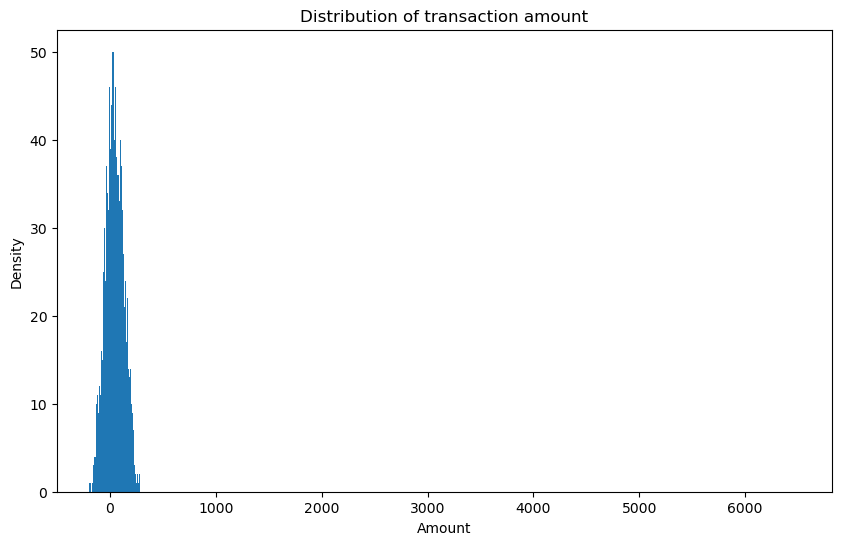

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
min_amount = transaction_df['amount'].min()
max_amount = transaction_df['amount'].max()

Z = np.random.normal(transaction_df['amount'].mean(),transaction_df['amount'].std(), 1000)
ax.hist(Z, bins=50)
ax.set_title("Distribution of transaction amount")
ax.set_xlabel("Amount")
ax.set_ylabel("Density")
ax.set_xlim(min_amount, max_amount)
plt.show()


#### Analyze transaction count over time

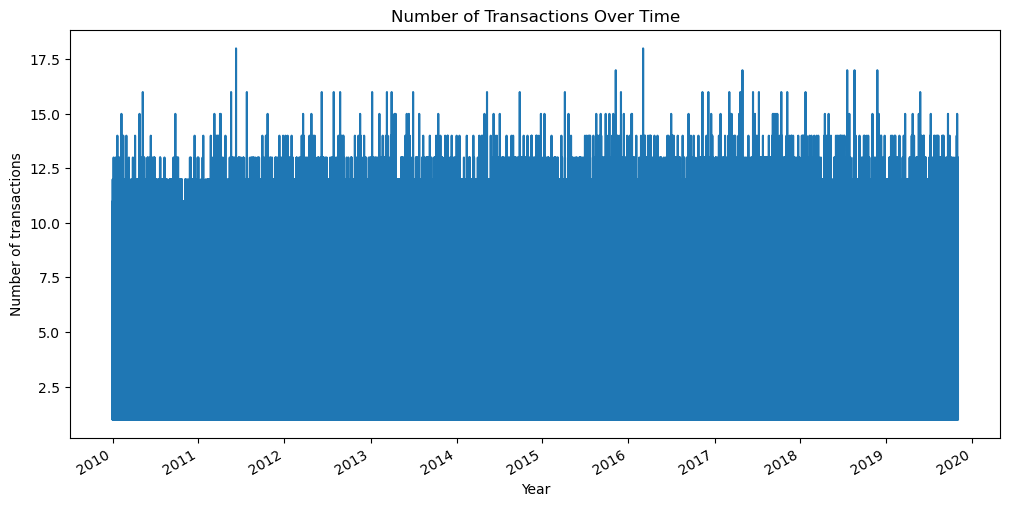

In [84]:
transaction_df['date'].value_counts().sort_index().plot(figsize=(12,6))
plt.title('Number of Transactions Over Time')
plt.xlabel("Year")
plt.ylabel("Number of transactions")
plt.show()

#### Analyze transactions by merchant category code (MCC)

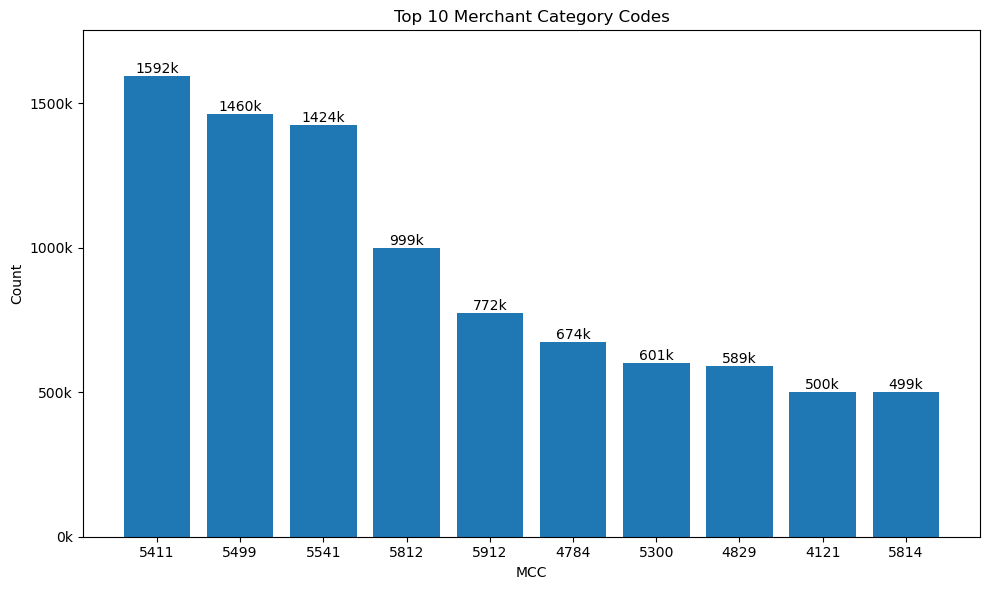

In [ ]:
# Filter DataFrame with the 10th most popular merchant
fig, ax = plt.subplots(figsize=(10,6))
mcc_counts = transaction_df['mcc'].value_counts()
top_10_mcc_counts = mcc_counts.nlargest(10)

# Convert mcc code to category, not int for better xtick labels
mcc_labels = [ str(mcc) for mcc in top_10_mcc_counts.index]
ax.bar(mcc_labels, top_10_mcc_counts.values)
ax.set_title('Top 10 Merchant Category Codes')
ax.set_xlabel("MCC")
ax.set_ylabel("Count")

# Adjust y axis
ax.set_ylim(0, max(top_10_mcc_counts.values) * 1.1)
y_tick_unit = np.arange(0, max(top_10_mcc_counts.values) + 1000, 500000)
ax.set_yticks(y_tick_unit)
ax.set_yticklabels([f'{int(y/1000)}k' for y in y_tick_unit])

# Add values for bar graph to increase visuality
for i, v in enumerate(top_10_mcc_counts.values):
	ax.text(i, v, f'{int(v/1000)}k',ha='center',va='bottom')

# Adjust the graph
plt.tight_layout()
plt.tick_params(which='major',labelsize=10)
plt.show()

#### Analyze what types of transactions are popular: online or physical store? 

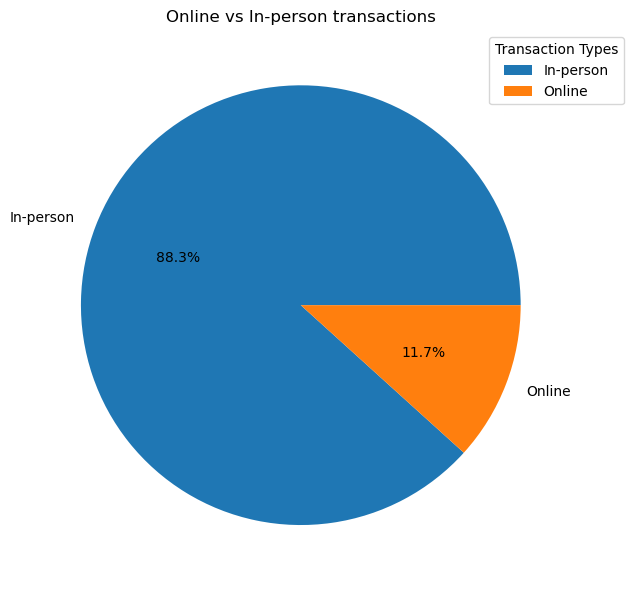

In [86]:
# Create a new column transaction_type in the dataframe, based on how the card are used.
transaction_df['transaction_type'] = transaction_df['use_chip'].apply(lambda x: 'Online' if x=='Online Transaction' else 'In-person')
type_count = transaction_df['transaction_type'].value_counts()

# Pie chart with percentage of transactions type
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(type_count, labels=type_count.index, autopct='%1.1f%%')
plt.legend(type_count.index, title='Transaction Types', bbox_to_anchor=(0.6,0,0.5,1))
plt.title("Online vs In-person transactions")
plt.tight_layout()
plt.show()

#### Split hour of transactions to a new column

In [87]:
transaction_df['hour'] = transaction_df['date'].dt.hour

#### Add a new custom columns for day_of_week

In [88]:
transaction_df['day_of_week'] = transaction_df['date'].dt.day_of_week

#### Correlation analysis between value of transaction, hour and day_of_week

In [64]:
correlation_matrix = transaction_df[['amount', 'hour', 'day_of_week']].corr()

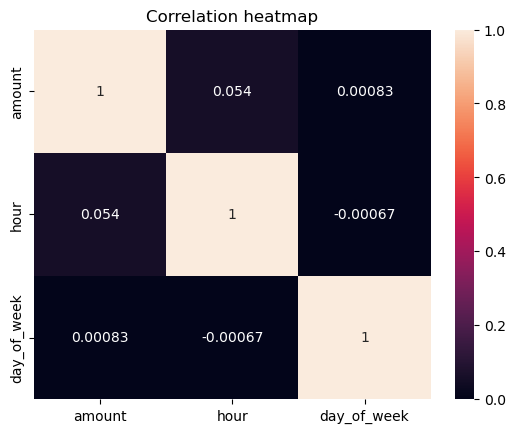

In [65]:
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation heatmap")
plt.show()

#### Add a customer column for date, without the timestamps, to group the dataframe by date of transaction

In [60]:
transaction_df['date_not_time'] = transaction_df['date'].dt.date
transaction_df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,transaction_type,hour,day_of_week,date_not_time
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,5499,NaN,In-person,0,4,2010-01-01
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,5311,NaN,In-person,0,4,2010-01-01
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,4829,NaN,In-person,0,4,2010-01-01
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,4829,NaN,In-person,0,4,2010-01-01
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,5813,NaN,In-person,0,4,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792,5499,NaN,In-person,23,3,2019-10-31
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,00nan,5815,NaN,Online,23,3,2019-10-31
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002,4900,NaN,In-person,23,3,2019-10-31
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014,5411,NaN,In-person,23,3,2019-10-31


#### Calculate total value and count number of daily transactions, save in the daily_transaction DataFrame

In [89]:
daily_transaction = transaction_df.groupby(transaction_df['date_not_time'])['amount'].agg(['count','sum'])

In [90]:
daily_transaction

,count,sum
date_not_time,,
2010-01-01,3463,124498.32
2010-01-02,2989,138700.62
2010-01-03,3311,135016.77
2010-01-04,3244,131315.75
2010-01-05,3330,143760.66
...,...,...
2019-10-27,3866,154794.08
2019-10-28,3944,168231.71
2019-10-29,3552,160928.07


#### Plot the daily counts and value of transactions

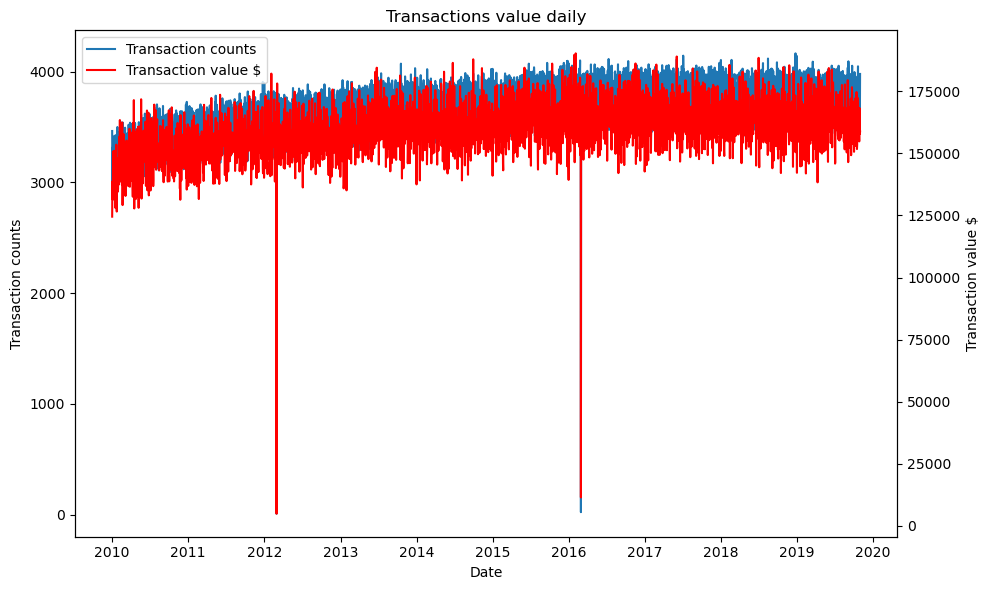

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(daily_transaction.index, daily_transaction['count'], label='Transaction counts')
ax.set_ylabel('Transaction counts')
ax2 = ax.twinx()
ax2.plot(daily_transaction.index, daily_transaction['sum'], label='Transaction value $', color ='red')
ax2.set_ylabel('Transaction value $')
ax.set_title("Transactions value daily")
ax.set_xlabel('Date')

# Handle legend
line1, legend1 = ax.get_legend_handles_labels()
line2, legend2 = ax2.get_legend_handles_labels()
ax.legend(line1+line2, legend1+legend2, loc = 'upper left')
plt.tight_layout()
plt.show()

#### Analyze average transaction value by hour

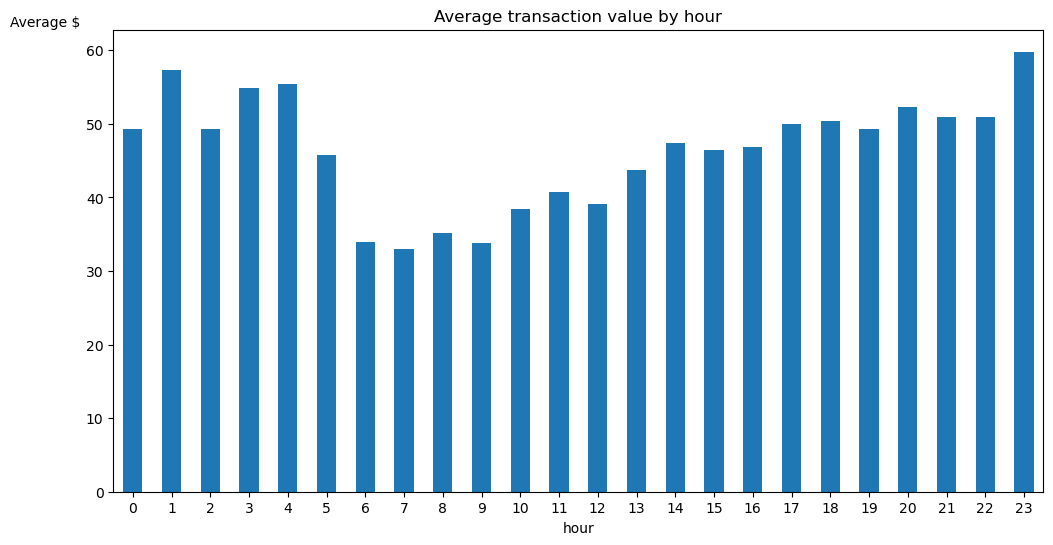

In [91]:
hourly_ave_df = transaction_df.groupby(transaction_df['hour'])['amount'].mean()
hourly_ave_df.plot(kind='bar', figsize=(12,6))

plt.xticks(rotation=0)
plt.ylabel('Average $', loc='top', rotation=0)

plt.title('Average transaction value by hour')
plt.show()

#### Check whether the DataFrame is missing a lot of value in column merchant_state

In [92]:
# transaction_df_test = transaction_df[transaction_df['merchant_city'] == 'ONLINE']
transaction_df_test = transaction_df[transaction_df['merchant_state'].isna()]
transaction_df_test.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,transaction_type,hour,day_of_week,date_not_time
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,NaN,00nan,4784,NaN,Online,0,4,2010-01-01
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,NaN,00nan,7801,NaN,Online,0,4,2010-01-01
18,7475346,2010-01-01 00:34:00,394,4717,26.04,Online Transaction,39021,ONLINE,NaN,00nan,4784,NaN,Online,0,4,2010-01-01
24,7475353,2010-01-01 00:43:00,301,3742,10.17,Online Transaction,39021,ONLINE,NaN,00nan,4784,NaN,Online,0,4,2010-01-01
26,7475356,2010-01-01 00:45:00,566,3439,16.86,Online Transaction,16798,ONLINE,NaN,00nan,4121,NaN,Online,0,4,2010-01-01


#### Analyze the numbers of transaction by merchant_state (20 largest states)

In [97]:
state_transaction = transaction_df['merchant_state'].value_counts()
state_transaction.head()

merchant_state
CA    1427087
TX    1010207
NY     857510
FL     701623
OH     484122
Name: count, dtype: int64

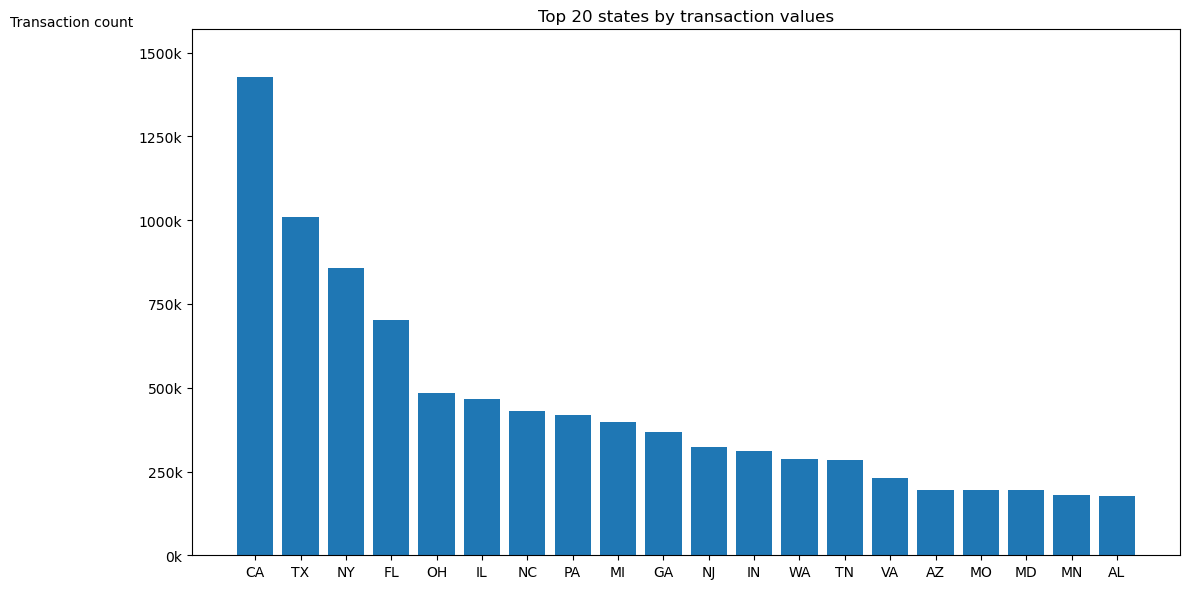

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
top_20_state_df = state_transaction.sort_values().nlargest(20)
ax.bar(top_20_state_df.index, top_20_state_df.values)

y_tick_unit = np.arange(0, max(top_20_state_df.values) + 100000, 250000)
ax.set_ylim(0, max(top_20_state_df.values) *1.1)
ax.set_yticks(y_tick_unit)
ax.set_yticklabels([f'{int(x/1000)}k' for x in y_tick_unit])
ax.set_title('Top 20 states by transaction values')

plt.ylabel('Transaction count', loc='top', rotation=0)
plt.tight_layout()
plt.show()

#### Customer Segmentation Analysis

In [105]:
customer_summary_df = transaction_df.groupby(transaction_df['client_id']).agg({'amount':['sum','count'], 'date': 'max'})
customer_summary_df.reset_index(inplace=True)
customer_summary_df.columns = ['client_id', 'total_spend', 'transaction_count', 'last_transaction_date']
data_last_date = transaction_df['date'].max()
customer_summary_df['recency'] = (data_last_date - customer_summary_df['last_transaction_date']).dt.days
customer_summary_df.head()


,client_id,total_spend,transaction_count,last_transaction_date,recency
0,0,625799.67,12795,2019-10-31 19:14:00,0
1,1,336187.37,10073,2019-10-31 16:15:00,0
2,2,291534.27,10612,2019-10-31 16:21:00,0
3,3,280685.46,6001,2019-10-31 14:30:00,0
4,4,595722.36,15043,2019-10-31 21:26:00,0


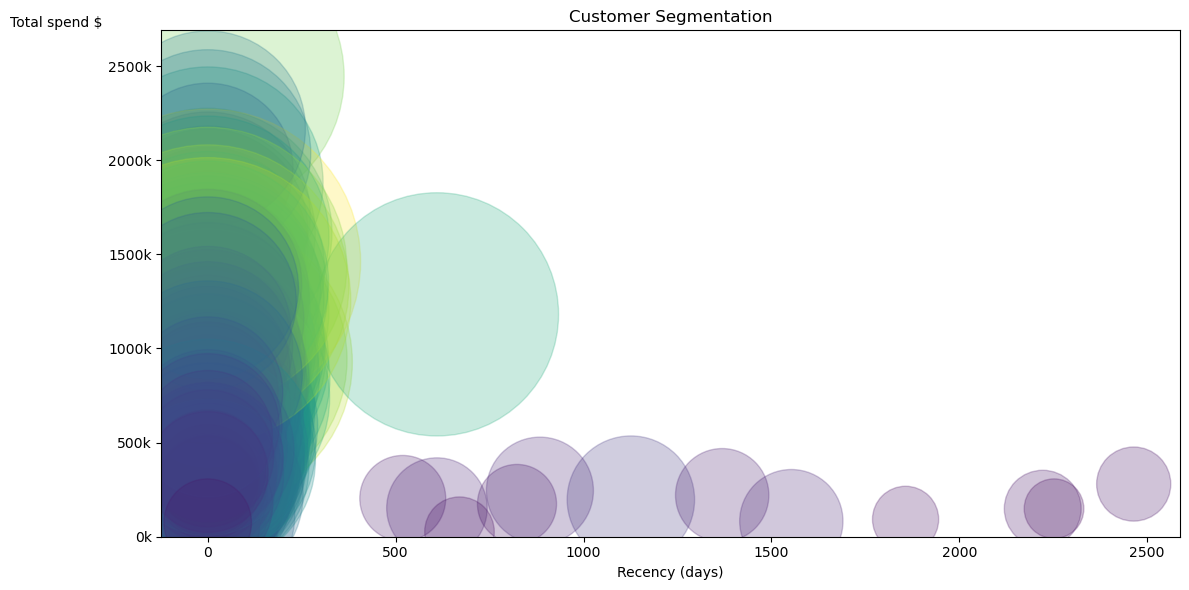

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(customer_summary_df['recency'], customer_summary_df['total_spend'], c=customer_summary_df['transaction_count'], 
		   s=customer_summary_df['transaction_count'], alpha=0.25)

y_tick_unit = np.arange(0, max(customer_summary_df['total_spend']) +500000, 500000)
ax.set_ylim(0, max(customer_summary_df['total_spend']) * 1.1)
ax.set_yticks(y_tick_unit)
ax.set_yticklabels([f'{int(y/1000)}k' for y in y_tick_unit])


plt.xlabel('Recency (days)')
plt.ylabel('Total spend $', loc='top', rotation=0)
plt.title('Customer Segmentation')
plt.tight_layout()
plt.show()

## 3. Data table: user_data.csv

### a. Load data

#### Read the csv file, sort by the customer id and reset the index

In [71]:
user_df = pd.read_csv('users_data.csv')
user_df.sort_values(by='id', inplace=True)
user_df.reset_index(drop=True, inplace=True)
user_df

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.59,-70.33,$29237,$59613,$36199,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.44,-87.18,$22247,$45360,$14587,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.87,$13461,$27447,$80850,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.89,-98.51,$13705,$27943,$18693,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.61,-122.30,$37485,$76431,$115362,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.92,-77.71,$20943,$39206,$9219,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.43,-95.24,$21956,$44768,$59862,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.92,-93.40,$39155,$38800,$25867,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.56,-122.37,$0,$645,$790,688,3


In [72]:
user_df.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


In [73]:
user_df.dtypes

id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
gender                object
address               object
latitude             float64
longitude            float64
per_capita_income     object
yearly_income         object
total_debt            object
credit_score           int64
num_credit_cards       int64
dtype: object

In [74]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


### b. Data inspection

#### Check the null and missing value in Dataframe

In [108]:
user_df.isna().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
birthday             0
dtype: int64

In [109]:
user_df.isnull().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
birthday             0
dtype: int64

#### Check duplicates user

In [77]:
user_df_duplicated = user_df.duplicated()
user_df[user_df_duplicated]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards


In [78]:
user_df

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.59,-70.33,$29237,$59613,$36199,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.44,-87.18,$22247,$45360,$14587,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.87,$13461,$27447,$80850,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.89,-98.51,$13705,$27943,$18693,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.61,-122.30,$37485,$76431,$115362,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.92,-77.71,$20943,$39206,$9219,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.43,-95.24,$21956,$44768,$59862,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.92,-93.40,$39155,$38800,$25867,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.56,-122.37,$0,$645,$790,688,3


#### Remove the $ sign from per_capita_income, yearly_income and total_debt

In [79]:
user_df['per_capita_income'] = user_df['per_capita_income'].str.replace(r"\$", '', regex=True).astype(float)
user_df['yearly_income'] = user_df['yearly_income'].str.replace(r"\$", '', regex=True).astype(float)
user_df['total_debt'] = user_df['total_debt'].str.replace(r"\$", '', regex=True).astype(float)
user_df

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.59,-70.33,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.44,-87.18,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.87,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.89,-98.51,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.61,-122.30,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.92,-77.71,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.43,-95.24,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.92,-93.40,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.56,-122.37,0.0,645.0,790.0,688,3


#### Add user's birthday column (only have birth_year and birth_month), in case necessary. The column's type is object, not datetime

In [80]:
user_df['birthday'] = user_df['birth_year'].astype(str) + '/' + user_df['birth_month'].astype(str).str.zfill(2)

In [81]:
user_df.info()
user_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
 14  birthday           2000 non-null   object 
dtypes: float64(5), int64(7), object(3)
memory usage: 234.5+ KB


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,birthday
0,0,33,69,1986,3,Male,858 Plum Avenue,43.59,-70.33,29237.0,59613.0,36199.0,763,4,1986/03
1,1,43,74,1976,4,Female,113 Burns Lane,30.44,-87.18,22247.0,45360.0,14587.0,704,3,1976/04
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.87,13461.0,27447.0,80850.0,673,5,1971/08
3,3,49,65,1970,12,Male,840 Elm Avenue,33.89,-98.51,13705.0,27943.0,18693.0,681,4,1970/12
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.61,-122.30,37485.0,76431.0,115362.0,716,5,1965/03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.92,-77.71,20943.0,39206.0,9219.0,605,4,1955/07
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.43,-95.24,21956.0,44768.0,59862.0,728,3,1973/06
1997,1997,76,69,1943,8,Male,765 Forest Street,44.92,-93.40,39155.0,38800.0,25867.0,758,7,1943/08
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.56,-122.37,0.0,645.0,790.0,688,3,1954/09


### c. Exploratory analysis

#### Check how many percentage are retired atm by comparing retirement_age with current_age

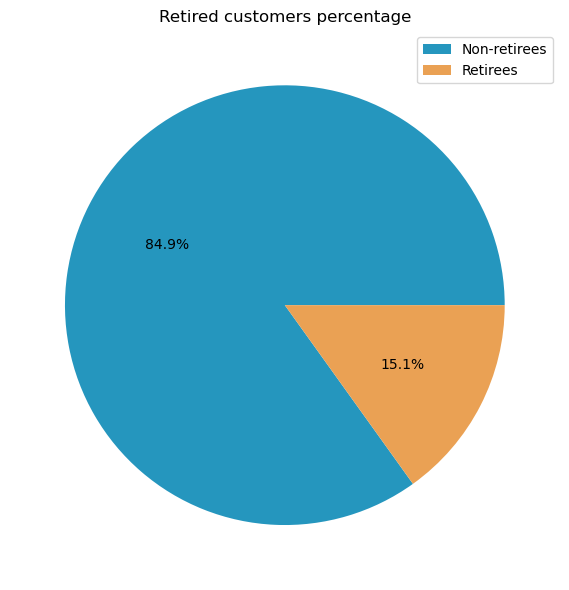

In [145]:
# Add a column to check if the person is retired: True if the current age is larger than retirement age and False otherwise
user_df['retired'] = user_df['current_age'] >= user_df['retirement_age']
retired_count = user_df['retired'].value_counts()

# Rename the index
retired_count = retired_count.rename(index={True:'Retirees', False:'Non-retirees'})

# Plot the pie chart
fig, ax = plt.subplots(figsize=(12,6))
colors = ['#2596be', '#eaa154']
ax.pie(retired_count, autopct='%1.1f%%', colors=colors)
ax.legend(retired_count.index)
ax.set_title('Retired customers percentage')
plt.tight_layout()
plt.show()

#### Analyze percentage of retirees and non-retirees customers among male and female 

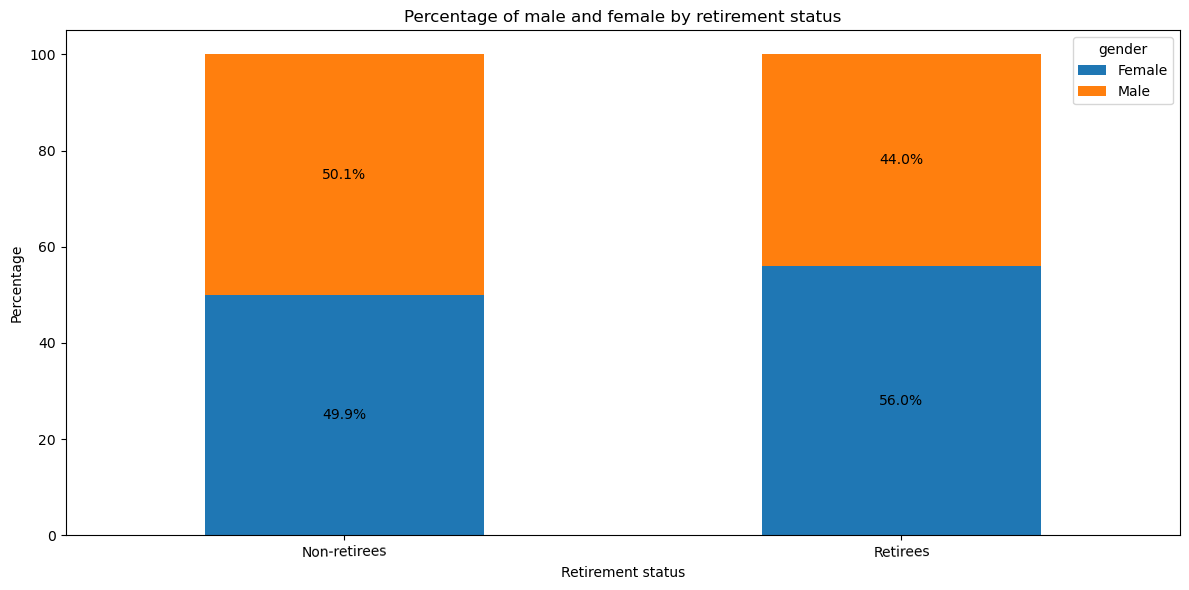

In [185]:
# Create a cross-tabulation of gender and retirement status
cross_tab = pd.crosstab(user_df['retired'], user_df['gender'])

# Calculate percentage
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize = (12, 6))
cross_tab_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage of male and female by retirement status')
ax.set_xlabel('Retirement status')
ax.set_ylabel('Percentage')
# ax.set_xticks({True:'Retirees', False:'Non-retirees'})
ax.set_xticklabels(['Non-retirees', 'Retirees'], rotation=True)

for c in ax.containers:
	ax.bar_label(c, fmt='%1.1f%%', label_type='center')

plt.tight_layout()
plt.show()


#### Plot the distribution of customers on maps

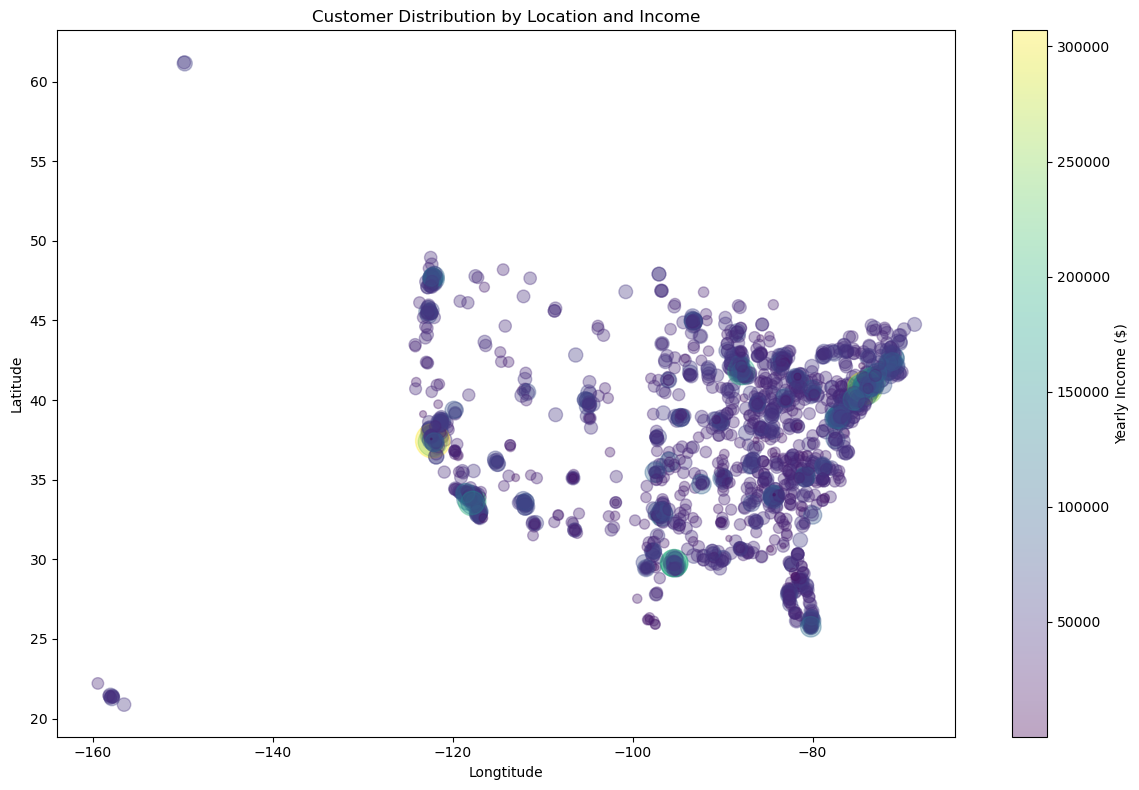

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter_map = ax.scatter(user_df['longitude'], user_df['latitude'], s=user_df['yearly_income']/500, alpha=0.35, c=user_df['yearly_income'], cmap='viridis')
ax.set_title("Customer Distribution by Location and Income")
ax.set_xlabel('Longtitude')
ax.set_ylabel('Latitude')

# Set the color bar for yearly_income scale
cbar = plt.colorbar(scatter_map)
cbar.set_label('Yearly Income ($)')

# Set a clear background
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

plt.tight_layout()
plt.show()


#### Customers have higher and lower yearly_income than per_capital_income

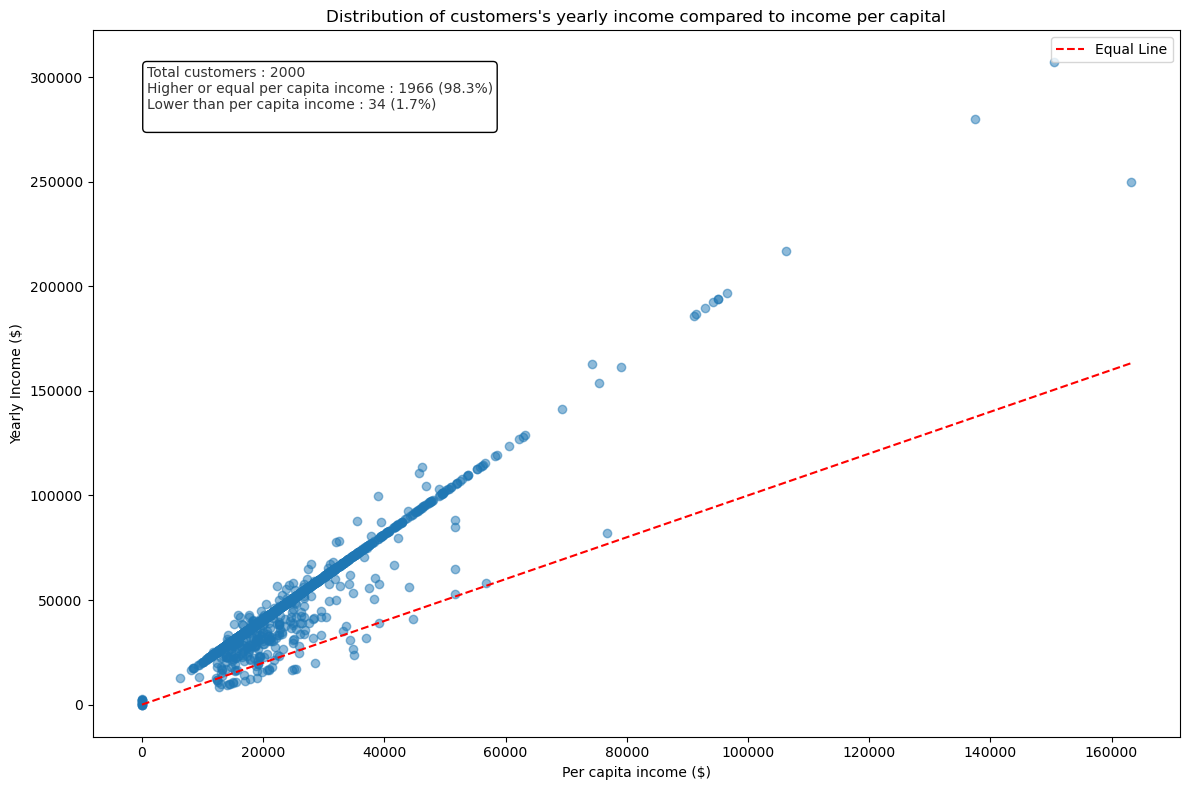

In [256]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(user_df['per_capita_income'], user_df['yearly_income'], alpha=0.5)
ax.plot([0, user_df['per_capita_income'].max()], [0, user_df['per_capita_income'].max()], 'r--', label='Equal Line')

ax.set_title('Distribution of customers\'s yearly income compared to income per capital')
plt.xlabel('Per capita income ($)')
plt.ylabel('Yearly Income ($)')
plt.legend()

# Statistic box
total_customer = len(user_df)
higher_count = (user_df['yearly_income'] >= user_df['per_capita_income']).sum()
lower_count = (user_df['yearly_income'] < user_df['per_capita_income']).sum()
plt.text(0.05, 0.95, f'Total customers : {total_customer}\n'
		 			f'Higher or equal per capita income : {higher_count} ({higher_count / total_customer:.1%})\n'
					f'Lower than per capita income : {lower_count} ({lower_count / total_customer:.1%})\n',
					transform=plt.gca().transAxes, verticalalignment='top',bbox=dict(boxstyle='round', facecolor='white'),alpha=0.8)

plt.tight_layout()
plt.show()

#### Correlation between total_debt and credit_scores

In [260]:
user_df_corr = user_df[['yearly_income', 'total_debt', 'credit_score']].corr()
user_df_corr

,yearly_income,total_debt,credit_score
yearly_income,1.000000,0.550641,0.000167
total_debt,0.550641,1.000000,-0.104537
credit_score,0.000167,-0.104537,1.000000


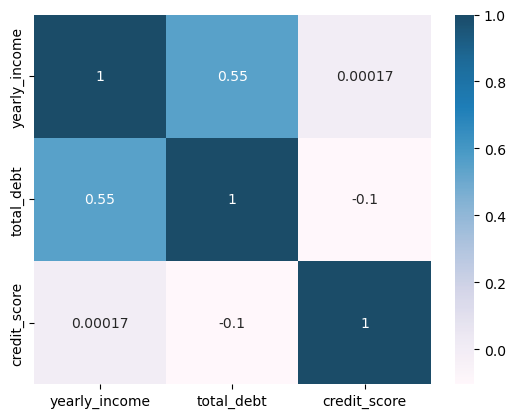

In [ ]:
sns.heatmap(user_df_corr, annot=True, alpha=0.9, cmap='PuBu')
plt.show()

Yearly income and total debt have high positive correlation: the higher the income, the more likely the customers to have debt. However, credit score and yearly income have almost no correlation. The same relationship between total debt and credit score, but the heatmap suggests a negative relationship between these if have. 

## 4. Integrate 3 data tables and analyse

### a. Integrate the dataset